# Compare sorters with some dataset generated with MEArec

Alessio Paolo Buccino author of [MEArec](https://github.com/alejoe91/MEArec) have generated some dataset

Here a comparison on the file **recordings_50cells_SqMEA-10-15um_60.0_10.0uV_27-03-2019_13_31.h5**


In [3]:
import time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import spiketoolkit as st
import spikeextractors as se
from spiketoolkit.comparison import (setup_comparison_study, run_study_sorters,
            aggregate_sorting_comparison, aggregate_performances_table)

%matplotlib notebook

In [4]:
p = '/media/samuel/SamCNRS/DataSpikeSorting/mearec/'
study_folder = p + 'study_mearec'

## Step 1 : setup study folder

The file have been downloaded in the current directory.

Note: this file have a 3D geometry for teh probe. Many sorters work only with 2D.
So here we remove the first dimenssion of "location" in the recording.


In [ ]:
mearec_filename = p + 'recordings_50cells_SqMEA-10-15um_60.0_10.0uV_27-03-2019_13_31.h5'

rec0  = se.MEArecRecordingExtractor(mearec_filename, locs_2d=False)
gt_sorting0 = se.MEArecSortingExtractor(mearec_filename)
for chan in rec0.get_channel_ids():
    loc = rec0.get_channel_property(chan, 'location')
    rec0.set_channel_property(chan, 'location', loc[1:])

gt_dict = {'rec0' : (rec0, gt_sorting0) }

setup_comparison_study(study_folder, gt_dict)


## Step 2 : run all sorter

This run all sorter on all recording and store the results in a working folder.

In [5]:
# sorter_list = ['tridesclous', 'herdingspikes','klusta', 'mountainsort4', 'spykingcircus']
# 'kilosort', 'kilosort2', 'ironclust' are not tested because I don't have matlab

sorter_list = ['tridesclous', 'herdingspikes', 'mountainsort4']
run_study_sorters(study_folder, sorter_list, mode='keep', engine='loop')

## Step3 : collect comparisons

This collect all results for all **(rec_name, sorter_name)** pair and apply the SortingComparison class for each.

This also concatenate performances in several dataframes.

rec0 herdingspikes
SUMMARY
GT num_units: 50
TESTED num_units: 45
num_well_detected: 12 
num_bad: 14
num_false_positive_units 0



<IPython.core.display.Javascript object>


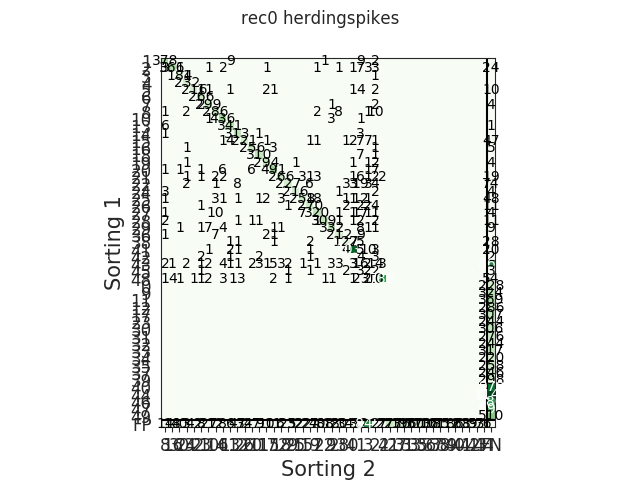

rec0 kilosort
SUMMARY
GT num_units: 50
TESTED num_units: 15
num_well_detected: 7 
num_bad: 4
num_false_positive_units 0



<IPython.core.display.Javascript object>


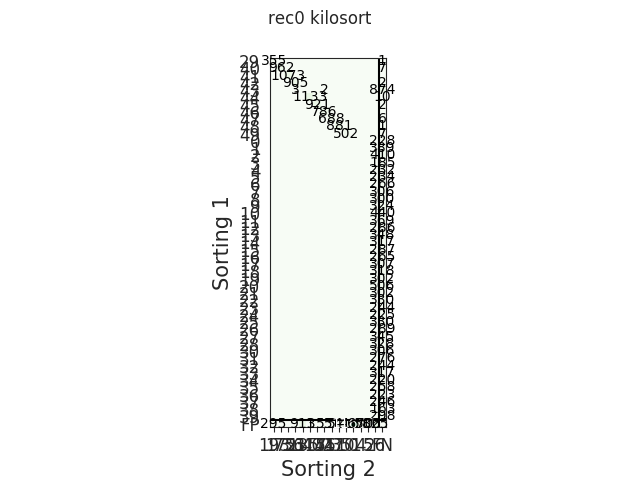

rec0 kilosort2
SUMMARY
GT num_units: 50
TESTED num_units: 105
num_well_detected: 43 
num_bad: 59
num_false_positive_units 2



<IPython.core.display.Javascript object>


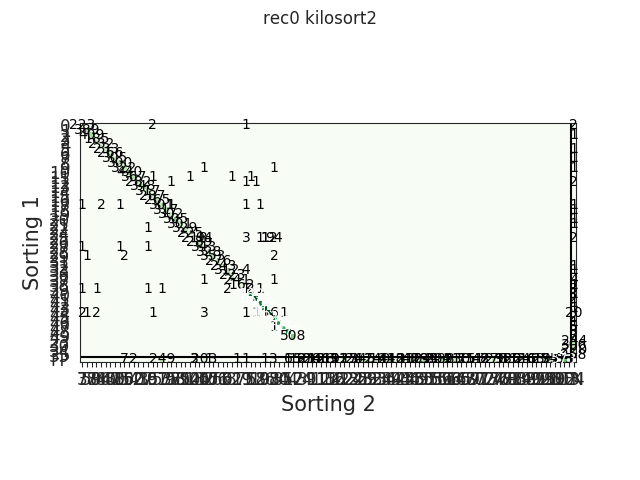

rec0 spykingcircus
SUMMARY
GT num_units: 50
TESTED num_units: 274
num_well_detected: 2 
num_bad: 252
num_false_positive_units 62



<IPython.core.display.Javascript object>


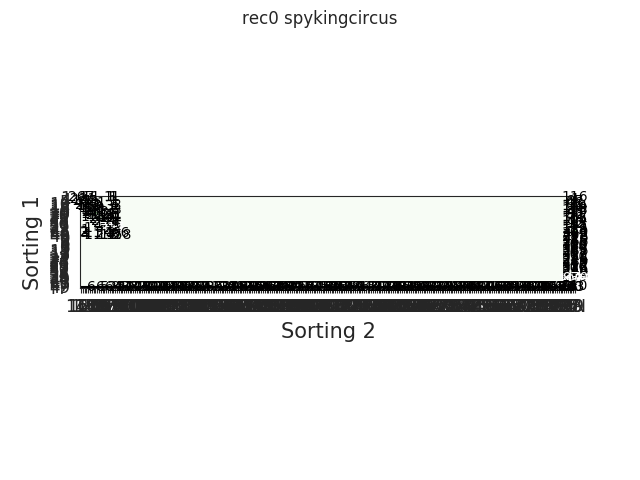

/home/samuel/Documents/projet/SpikeInterface/spiketoolkit/spiketoolkit/comparison/comparisontools.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  fp = len(np.where('FP' == lab_st2)[0])


rec0 tridesclous
SUMMARY
GT num_units: 50
TESTED num_units: 32
num_well_detected: 19 
num_bad: 1
num_false_positive_units 0



<IPython.core.display.Javascript object>


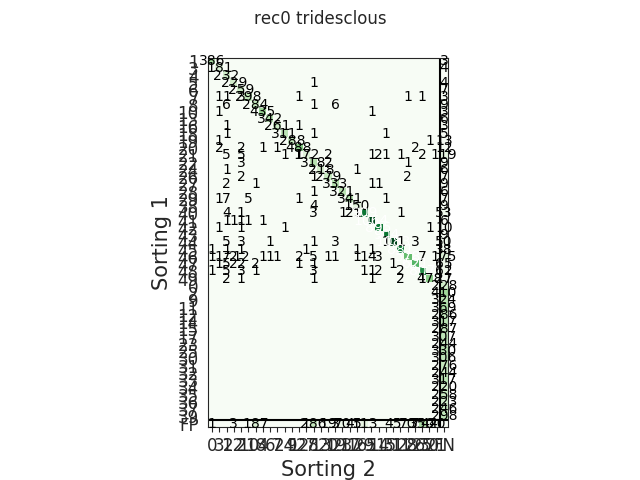

In [5]:
comparisons = aggregate_sorting_comparison(study_folder, exhaustive_gt=True)

for (rec_name, sorter_name), comp in comparisons.items():
    print(rec_name, sorter_name)
    comp.print_summary()
    fig, ax = plt.subplots()
    comp.plot_confusion_matrix(ax=ax)
    fig.suptitle(rec_name + ' ' + sorter_name)

## Step 4 : collect tables

**dataframes** is a dict that contain several results formated in dataframes:
  * run_times : time for computing each one
  * perf_pooled_with_sum: performance with method **pooled_with_sum**
  * perf_pooled_with_average: performance with method **pooled_with_average**
  * nb_units_above_threshold: count how many units detect with a treshold on a perf columns.

In [6]:
dataframes = aggregate_performances_table(study_folder, exhaustive_gt=True)

In [9]:
dataframes['perf_pooled_with_sum']

accuracy    recall precision false_discovery_rate  \
rec_name sorter_name                                                        
rec0     herdingspikes  0.506712  0.544028  0.880774             0.119226   
         tridesclous    0.658647  0.697254  0.922454            0.0775463   
         kilosort       0.366699  0.396828   0.82847              0.17153   
         kilosort2      0.922512  0.947002  0.972731            0.0272686   
         spykingcircus   0.33921  0.340132  0.992068           0.00793201   

                        miss_rate misclassification_rate  
rec_name sorter_name                                      
rec0     herdingspikes   0.447324              0.0189663  
         tridesclous     0.300613             0.00704599  
         kilosort         0.60195             0.00202693  
         kilosort2      0.0526036             0.00743207  
         spykingcircus    0.65576             0.00622557

In [10]:
dataframes['perf_pooled_with_average']

accuracy    recall precision false_discovery_rate  \
rec_name sorter_name                                                        
rec0     herdingspikes  0.536666  0.576064  0.897008             0.102992   
         tridesclous    0.557193  0.590798  0.940635            0.0593648   
         kilosort       0.179379  0.199066  0.818532             0.181468   
         kilosort2      0.897439  0.917387  0.978227            0.0217732   
         spykingcircus  0.314492  0.315895  0.991791           0.00820865   

                        miss_rate misclassification_rate  
rec_name sorter_name                                      
rec0     herdingspikes    0.42142              0.0198142  
         tridesclous     0.408546             0.00597257  
         kilosort        0.800078            0.000942938  
         kilosort2      0.0825369             0.00895285  
         spykingcircus   0.682318             0.00540255

In [11]:
dataframes['count_units']

num_gt  num_sorter  num_well_detected  num_redundant  \
rec_name sorter_name                                                           
rec0     herdingspikes      50          45                 12              6   
         tridesclous        50          32                 19              0   
         kilosort           50          15                  7              3   
         kilosort2          50         105                 43              3   
         spykingcircus      50         274                  2             20   

                        num_false_positive  num_bad  
rec_name sorter_name                                 
rec0     herdingspikes                   0       14  
         tridesclous                     0        1  
         kilosort                        0        4  
         kilosort2                       2       59  
         spykingcircus                  62      252

## Step 5: inspect result by spiketrain

For finer exploration, we can also compute for all **(rec_name, sorter_name)** pair the performance with method=**by_spiketrain**.

This give a give result for each units of the ground truth.

In [12]:
for (rec_name, sorter_name), comp in comparisons.items():
    print(rec_name, sorter_name)
    perf = comp.get_performance(method='by_spiketrain')
    display(perf)

rec0 herdingspikes


,accuracy,recall,precision,false_discovery_rate,miss_rate,misclassification_rate
0,0.000000,0.000000,NaN,NaN,1.000000,0.000000
1,0.964286,1.000000,0.964286,0.035714,0.000000,0.028278
2,0.897059,0.938462,0.953125,0.046875,0.058537,0.048780
3,0.821429,1.000000,0.821429,0.178571,0.000000,0.005405
4,0.987234,1.000000,0.987234,0.012766,0.000000,0.000000
5,0.805970,0.955752,0.837209,0.162791,0.042735,0.034188
6,0.970803,1.000000,0.970803,0.029197,0.000000,0.000000
7,0.906061,0.986799,0.917178,0.082822,0.013072,0.009804
8,0.959732,1.000000,0.959732,0.040268,0.000000,0.046667
9,0.000000,0.000000,NaN,NaN,1.000000,0.000000


rec0 kilosort


,accuracy,recall,precision,false_discovery_rate,miss_rate,misclassification_rate
0,0.000000,0.000000,NaN,NaN,1.000000,0.000000
1,0.000000,0.000000,NaN,NaN,1.000000,0.000000
2,0.000000,0.000000,NaN,NaN,1.000000,0.000000
3,0.000000,0.000000,NaN,NaN,1.000000,0.000000
4,0.000000,0.000000,NaN,NaN,1.000000,0.000000
5,0.000000,0.000000,NaN,NaN,1.000000,0.000000
6,0.000000,0.000000,NaN,NaN,1.000000,0.000000
7,0.000000,0.000000,NaN,NaN,1.000000,0.000000
8,0.000000,0.000000,NaN,NaN,1.000000,0.000000
9,0.000000,0.000000,NaN,NaN,1.000000,0.000000


rec0 kilosort2


,accuracy,recall,precision,false_discovery_rate,miss_rate,misclassification_rate
0,0.991111,0.991111,1.000000,0.000000,0.008772,0.013158
1,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
2,0.997561,0.997561,1.000000,0.000000,0.002439,0.000000
3,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
4,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
5,0.995726,0.995726,1.000000,0.000000,0.004274,0.000000
6,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
7,0.996732,0.996732,1.000000,0.000000,0.003268,0.000000
8,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
9,0.975758,0.996904,0.978723,0.021277,0.003086,0.003086


rec0 spykingcircus


,accuracy,recall,precision,false_discovery_rate,miss_rate,misclassification_rate
0,0.000000,0.000000,NaN,NaN,1.000000,0.000000
1,0.697128,0.697128,1.000000,0.000000,0.298201,0.015424
2,0.000000,0.000000,NaN,NaN,1.000000,0.000000
3,0.000000,0.000000,NaN,NaN,1.000000,0.000000
4,0.995690,0.995690,1.000000,0.000000,0.004310,0.000000
5,0.711207,0.711207,1.000000,0.000000,0.286325,0.008547
6,0.000000,0.000000,NaN,NaN,1.000000,0.000000
7,0.000000,0.000000,NaN,NaN,1.000000,0.000000
8,0.000000,0.000000,NaN,NaN,1.000000,0.000000
9,0.000000,0.000000,NaN,NaN,1.000000,0.000000


rec0 tridesclous


,accuracy,recall,precision,false_discovery_rate,miss_rate,misclassification_rate
0,0.000000,0.000000,NaN,NaN,1.000000,0.000000
1,0.989744,0.992288,0.997416,0.002584,0.007712,0.000000
2,0.000000,0.000000,NaN,NaN,1.000000,0.000000
3,0.978378,0.978378,1.000000,0.000000,0.021622,0.000000
4,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
5,0.970339,0.982833,0.987069,0.012931,0.017094,0.004274
6,0.973684,0.973684,1.000000,0.000000,0.026316,0.000000
7,0.990033,0.990033,1.000000,0.000000,0.009804,0.016340
8,0.591667,0.969283,0.602972,0.397028,0.030000,0.023333
9,0.000000,0.000000,NaN,NaN,1.000000,0.000000


In [13]:
for (rec_name, sorter_name), comp in comparisons.items():
    print(rec_name, sorter_name)
    perf = comp.get_performance(method='raw_count')
    display(perf)

rec0 herdingspikes


,tp,fn,cl,fp,num_gt,num_tested,tested_id
0,0,228,0,0,228,0,-1
1,378,0,11,14,389,404,8
2,366,24,20,18,410,388,16
3,184,0,1,40,185,227,30
4,232,0,0,3,232,237,24
5,216,10,8,42,234,258,32
6,266,0,0,8,266,274,23
7,299,4,3,27,306,335,10
8,286,0,14,12,300,317,14
9,0,324,0,0,324,0,-1


rec0 kilosort


,tp,fn,cl,fp,num_gt,num_tested,tested_id
0,0,228,0,0,228,0,-1
1,0,389,0,0,389,0,-1
2,0,410,0,0,410,0,-1
3,0,185,0,0,185,0,-1
4,0,232,0,0,232,0,-1
5,0,234,0,0,234,0,-1
6,0,266,0,0,266,0,-1
7,0,306,0,0,306,0,-1
8,0,300,0,0,300,0,-1
9,0,324,0,0,324,0,-1


rec0 kilosort2


,tp,fn,cl,fp,num_gt,num_tested,tested_id
0,223,2,3,0,228,223,7
1,389,0,0,0,389,389,38
2,409,1,0,0,410,409,58
3,185,0,0,0,185,185,78
4,232,0,0,0,232,232,94
5,233,1,0,0,234,233,40
6,266,0,0,0,266,266,60
7,305,1,0,0,306,305,80
8,300,0,0,0,300,300,75
9,322,1,1,7,324,331,86


rec0 spykingcircus


,tp,fn,cl,fp,num_gt,num_tested,tested_id
0,0,228,0,0,228,0,-1
1,267,116,6,0,389,267,146
2,0,410,0,0,410,0,-1
3,0,185,0,0,185,0,-1
4,231,1,0,0,232,231,167
5,165,67,2,0,234,165,14
6,0,266,0,0,266,0,-1
7,0,306,0,0,306,0,-1
8,0,300,0,0,300,0,-1
9,0,324,0,0,324,0,-1


rec0 tridesclous


,tp,fn,cl,fp,num_gt,num_tested,tested_id
0,0,228,0,0,228,0,-1
1,386,3,0,1,389,387,0
2,0,410,0,0,410,0,-1
3,181,4,0,0,185,186,3
4,232,0,0,0,232,232,1
5,229,4,1,3,234,234,22
6,259,7,0,0,266,259,2
7,298,3,5,0,306,303,10
8,284,9,7,187,300,474,18
9,0,324,0,0,324,0,-1


## Step 6 : easy plot with seaborn

With the seaborn package, it is very easy to summary with plot dataframes.

Here some basic example for performances and run times.

### Run times

In [ ]:
run_times = dataframes['run_times'].reset_index()
fig, ax = plt.subplots()
sn.barplot(data=run_times, x='rec_name', y='run_time', hue='sorter_name', ax=ax)
ax.set_title('Run times (s)')

### Accuracy sum

<IPython.core.display.Javascript object>


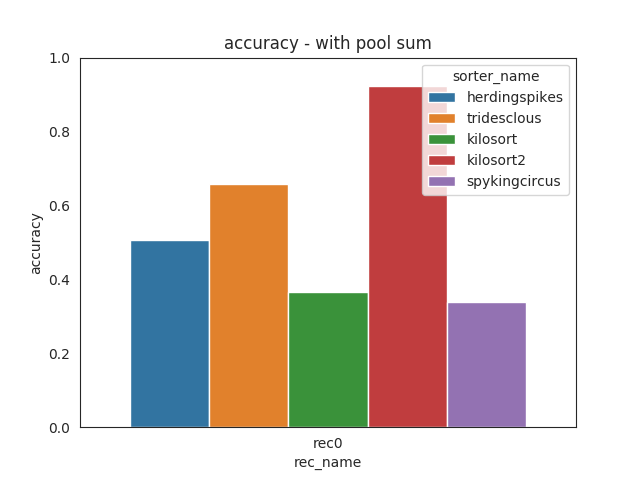

(0, 1)

In [15]:
perfs = dataframes['perf_pooled_with_sum'].reset_index()
fig, ax = plt.subplots()
sn.barplot(data=perfs, x='rec_name', y='accuracy', hue='sorter_name', ax=ax)
ax.set_title('accuracy - with pool sum')
ax.set_ylim(0, 1)

<IPython.core.display.Javascript object>


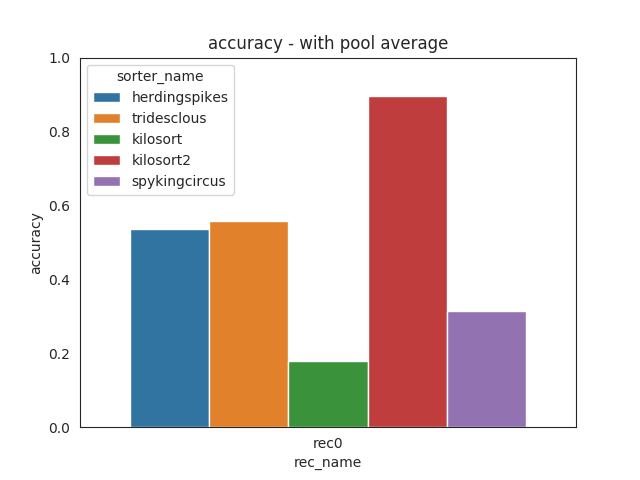

(0, 1)

In [16]:
perfs = dataframes['perf_pooled_with_average'].reset_index()
fig, ax = plt.subplots()
sn.barplot(data=perfs, x='rec_name', y='accuracy', hue='sorter_name', ax=ax)
ax.set_title('accuracy - with pool average')
ax.set_ylim(0, 1)

### How many units detected above threshold

The max is 50 cells.

<IPython.core.display.Javascript object>


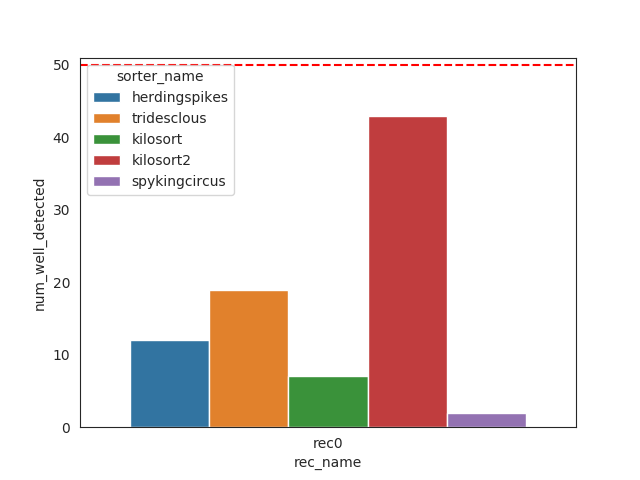

In [18]:
perfs = dataframes['count_units'].reset_index()

fig, ax = plt.subplots()
ax = sn.barplot(data=perfs, x='rec_name', y='num_well_detected', hue='sorter_name', ax=ax)
ax.set_ylim(0, 51)
ax.axhline(50, ls='--', color='red')

<IPython.core.display.Javascript object>


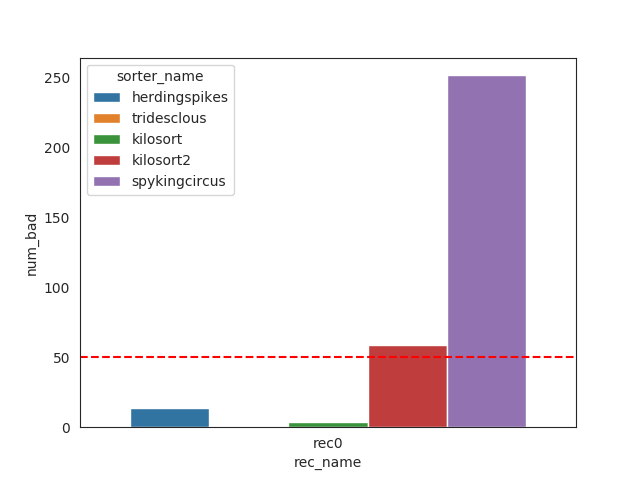

In [20]:
perfs = dataframes['count_units'].reset_index()

fig, ax = plt.subplots()
ax = sn.barplot(data=perfs, x='rec_name', y='num_bad', hue='sorter_name', ax=ax)
ax.axhline(50, ls='--', color='red')

<IPython.core.display.Javascript object>


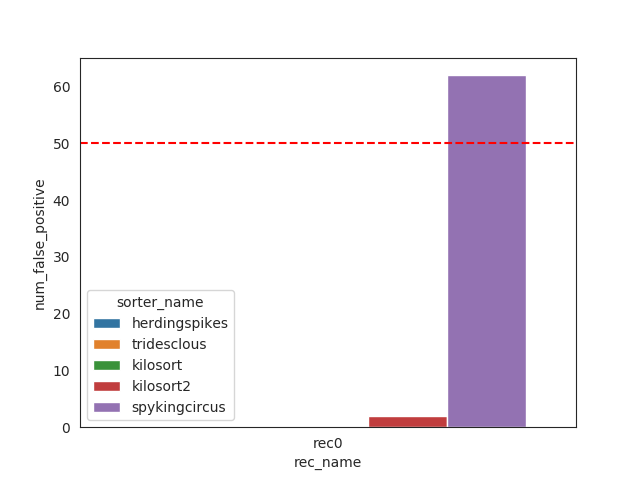

In [21]:
perfs = dataframes['count_units'].reset_index()

fig, ax = plt.subplots()
ax = sn.barplot(data=perfs, x='rec_name', y='num_false_positive', hue='sorter_name', ax=ax)
ax.axhline(50, ls='--', color='red')

<IPython.core.display.Javascript object>


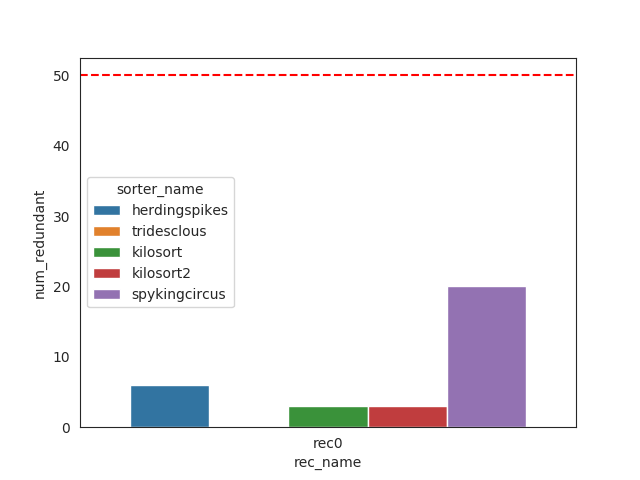

In [22]:
perfs = dataframes['count_units'].reset_index()

fig, ax = plt.subplots()
ax = sn.barplot(data=perfs, x='rec_name', y='num_redundant', hue='sorter_name', ax=ax)
ax.axhline(50, ls='--', color='red')